# Análise de Risco no Transporte Público

O principal objetivo desse projeto é responder 10 perguntas sobre os dados, são elas:

1. Qual a quantidade de incidentes por gênero?
2. Qual faixa etária esteve mais envolvida nos incidentes?
3. Qual o percentual de incidentes por tipo de evento (Incident Event 
Type)?
4. Como foi a evolução de incidentes por mês ao longo do tempo?
5. Quando o incidente foi “Collision Incident” em qual mês houve o maior 
número de incidentes envolvendo pessoas do sexo feminino?
6. Qual foi a média de incidentes por mês envolvendo crianças (Child)?
7. Considerando a descrição de incidente como “Injuries treated on scene” 
(coluna Injury Result Description), qual o total de incidentes de pessoas 
do sexo masculino e sexo feminino?
8. No ano de 2017 em qual mês houve mais incidentes com idosos 
(Elderly)?
9. Considerando o Operador qual a distribuição de incidentes ao longo do 
tempo?
10. Qual o tipo de incidente mais comum com ciclistas?

## Importando Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Formatação dos gráficos
plt.figure(figsize = (10, 6))
# matplotlib.use('nbAgg')
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set_style('whitegrid')

<Figure size 1000x600 with 0 Axes>

Carregando dataset.

In [2]:
df = pd.read_excel('dados/TFL_Bus_Safety.xlsx')
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


Verificando se os dtypes das colunas estão corretos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

## Data Wrangling

In [4]:
###

## Análise Exploratória

**Qual a quantidade de incidentes por gênero?**

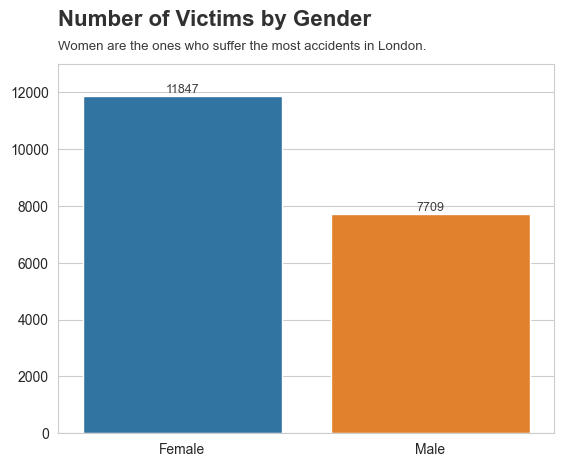

In [5]:
p1 = df[df['Victims Sex'] != 'Unknown']

ax = sns.countplot(x = p1['Victims Sex'].sort_values())
plt.title('Number of Victims by Gender', fontsize = 16, y = 1.08, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 13000)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 13500,
        s = 'Women are the ones who suffer the most accidents in London.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

**Qual faixa etária esteve mais envolvida nos incidentes?**

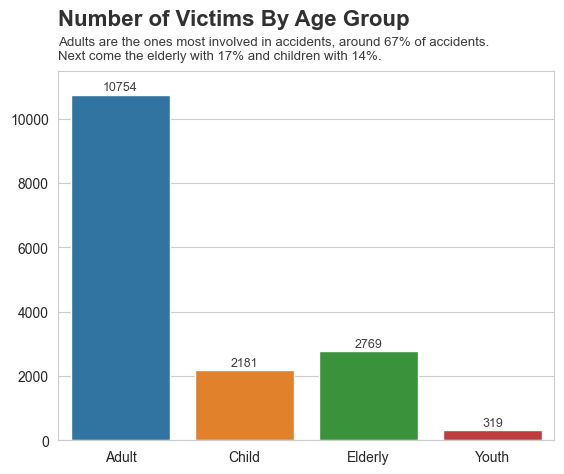

In [6]:
p2 = df[df['Victims Age'] != 'Unknown']

ax = sns.countplot(x = p2['Victims Age'].sort_values())
plt.title('Number of Victims By Age Group', fontsize = 16, y = 1.1, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 11500)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 11850,
        s = 'Adults are the ones most involved in accidents, around 67% of accidents. \nNext come the elderly with 17% and children with 14%.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

In [7]:
p2['Victims Age'].value_counts(normalize = True).round(2)

Victims Age
Adult      0.67
Elderly    0.17
Child      0.14
Youth      0.02
Name: proportion, dtype: float64